In [1]:
!pip install -U torch torchvision
!git clone https://github.com/Shulin-Zhang/pytorch_models.git

     |████████████████████████████████| 773.1MB 32kB/s s eta 0:00:01   |█                               | 26.3MB 6.5MB/s eta 0:01:56     |██                              | 50.4MB 31.9MB/s eta 0:00:23     |███                             | 73.9MB 30.3MB/s eta 0:00:24     |███▋                            | 87.8MB 30.3MB/s eta 0:00:23�██████████▊                | 379.4MB 34.3MB/s eta 0:00:12     |███████████████▊                | 381.0MB 34.3MB/s eta 0:00:12     |███████████████████▎            | 465.5MB 31.0MB/s eta 0:00:10��██████          | 529.4MB 32.3MB/s eta 0:00:08MB/s eta 0:00:05   |████████████████████████████▏   | 679.3MB 27.4MB/s eta 0:00:046MB 27.4MB/s eta 0:00:04     |██████████████████████████████▊ | 742.1MB 36.5MB/s eta 0:00:01
     |████████████████████████████████| 10.1MB 24.1MB/s eta 0:00:01
ERROR: allennlp 0.9.0 requires flaky, which is not installed.
ERROR: allennlp 0.9.0 requires responses>=0.7, which is not installed.
  Found existing installation: torch 1.2.0
    Un

In [2]:
!ls
!mkdir ./data

__notebook_source__.ipynb  pytorch_models


In [3]:

import torchvision
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader


def build_minist_transforms():
    train_transform = transforms.Compose([
        transforms.Pad(4),
        transforms.RandomResizedCrop((28, 28), scale=(0.8, 1.2),
                                     ratio=(0.8, 1.2)),
        transforms.RandomRotation(10),
        transforms.ColorJitter(brightness=0.1, contrast=0.1),
        transforms.ToTensor(),
        transforms.Lambda(lambda img: img / 255)
    ])

    test_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Lambda(lambda img: img / 255)
    ])

    return train_transform, test_transform


def build_minist_dataset(path):
    train_transform, test_transform = build_minist_transforms()

    trainset = datasets.MNIST(path, True, train_transform, download=True)
    testset = datasets.MNIST(path, False, test_transform, download=True)

    return trainset, testset


def build_minist_loader(path, batch, workers=2):
    trainset, testset = build_minist_dataset(path)

    trainloader = DataLoader(trainset, batch_size=batch, shuffle=True,
                             num_workers=workers)
    testloader = DataLoader(testset, batch_size=batch, shuffle=False,
                            num_workers=workers)

    return trainloader, testloader


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import numpy as np
from matplotlib import pylab as plt

from pytorch_models.image_classification import minist
from pytorch_models.image_classification.resnet import Resnet
from pytorch_models.image_classification.resnext import ResNeXt
from pytorch_models.image_classification.se_resnet import SE_resnet
from pytorch_models.image_classification.learner import Learner
from pytorch_models.utils.lr_finder import Lr_finder

In [5]:
trainloader, testloader = minist.build_minist_loader('./data/minist', batch=64, workers=2)

0it [00:00, ?it/s]

9920512it [00:01, 8774440.57it/s]                            


Extracting ./data/minist/MNIST/raw/train-images-idx3-ubyte.gz to ./data/minist/MNIST/raw


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 134882.13it/s]           
0it [00:00, ?it/s]

Extracting ./data/minist/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/minist/MNIST/raw


1654784it [00:00, 1899362.39it/s]                            
0it [00:00, ?it/s]

Extracting ./data/minist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/minist/MNIST/raw


8192it [00:00, 29589.29it/s]            

Extracting ./data/minist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/minist/MNIST/raw
Processing...
Done!


In [6]:
def plot_batch(loader):
    imgs = next(iter(loader))[0]
    grid = torchvision.utils.make_grid(imgs)
    grid = grid.numpy().transpose([1, 2, 0]) * 255
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(grid)

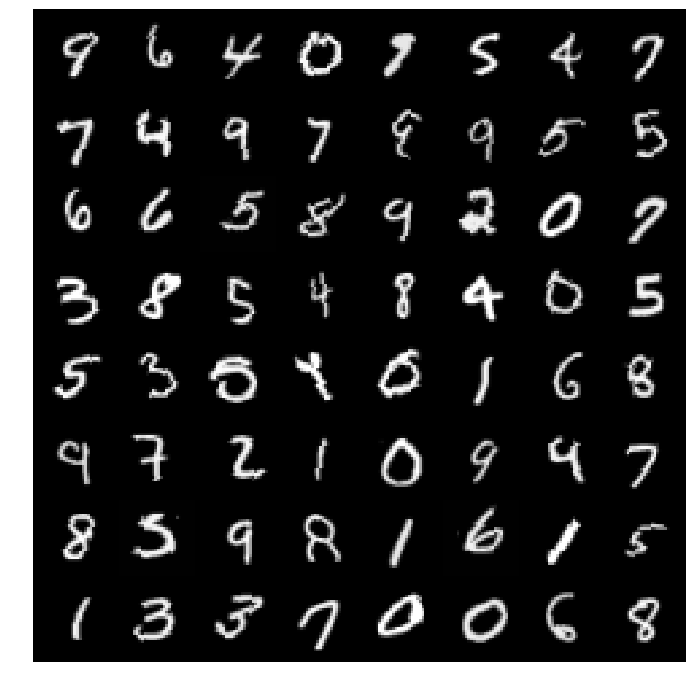

In [7]:
plot_batch(trainloader)

In [8]:
model = Resnet(10, 1, activation=nn.ReLU(True), dropout=0)

In [9]:
lr_finder = Lr_finder(model, trainloader, nn.CrossEntropyLoss(), optim.SGD(model.parameters(), 0.1, weight_decay=0.003))

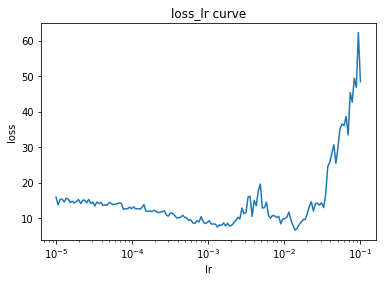

In [10]:
lr_finder.lr_find(steps=150, lr_range=(1e-5, 1e-1), plot=True)

In [11]:
learn = Learner(model)

In [12]:
steps, losses = learn.fit(trainloader, 3e-2, 10, weight_decay=0.003, print_steps=200)

epoch: 1    	step: 200    	loss: 1.2326
epoch: 1    	step: 400    	loss: 0.7662
epoch: 1    	step: 600    	loss: 0.2980
epoch: 1    	step: 800    	loss: 0.1042
epoch: 2    	step: 200    	loss: 0.1681
epoch: 2    	step: 400    	loss: 0.1705
epoch: 2    	step: 600    	loss: 0.0992
epoch: 2    	step: 800    	loss: 0.2084
epoch: 3    	step: 200    	loss: 0.0783
epoch: 3    	step: 400    	loss: 0.0709
epoch: 3    	step: 600    	loss: 0.1640
epoch: 3    	step: 800    	loss: 0.2158
epoch: 4    	step: 200    	loss: 0.0872
epoch: 4    	step: 400    	loss: 0.2281
epoch: 4    	step: 600    	loss: 0.1036
epoch: 4    	step: 800    	loss: 0.0707
epoch: 5    	step: 200    	loss: 0.0263
epoch: 5    	step: 400    	loss: 0.1079
epoch: 5    	step: 600    	loss: 0.0868
epoch: 5    	step: 800    	loss: 0.0195
epoch: 6    	step: 200    	loss: 0.0534
epoch: 6    	step: 400    	loss: 0.0151
epoch: 6    	step: 600    	loss: 0.0697
epoch: 6    	step: 800    	loss: 0.0061
epoch: 7    	step: 200    	loss: 0.0037


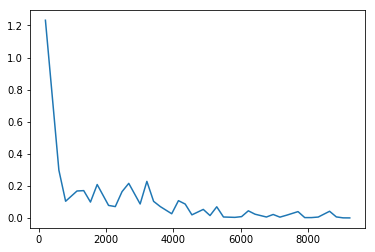

In [13]:
plt.plot(steps, losses)

In [14]:
learn.evaluate(trainloader)

0.9965

In [15]:
learn.evaluate(testloader)

0.9947

In [16]:
test_predictions = learn.predict(testloader)
test_predictions = np.argmax(test_predictions, axis=1)
test_predictions.shape

(10000,)

In [17]:
test_labels = [data[1].numpy() for data in testloader]
test_labels = np.concatenate(test_labels)
test_labels.shape

(10000,)

In [18]:
test_imgs = [data[0].numpy() for data in testloader]
test_imgs = np.concatenate(test_imgs)
test_imgs.shape

(10000, 1, 28, 28)

In [19]:
error_index = np.argwhere(test_predictions != test_labels)

In [20]:
error_imgs = test_imgs[error_index].squeeze()
error_labels = test_labels[error_index].squeeze()
error_predictions = test_predictions[error_index].squeeze()
error_imgs.shape, error_labels.shape, error_predictions.shape

((496, 28, 28), (496,), (496,))

ValueError: num must be 1 <= num <= 72, not 73

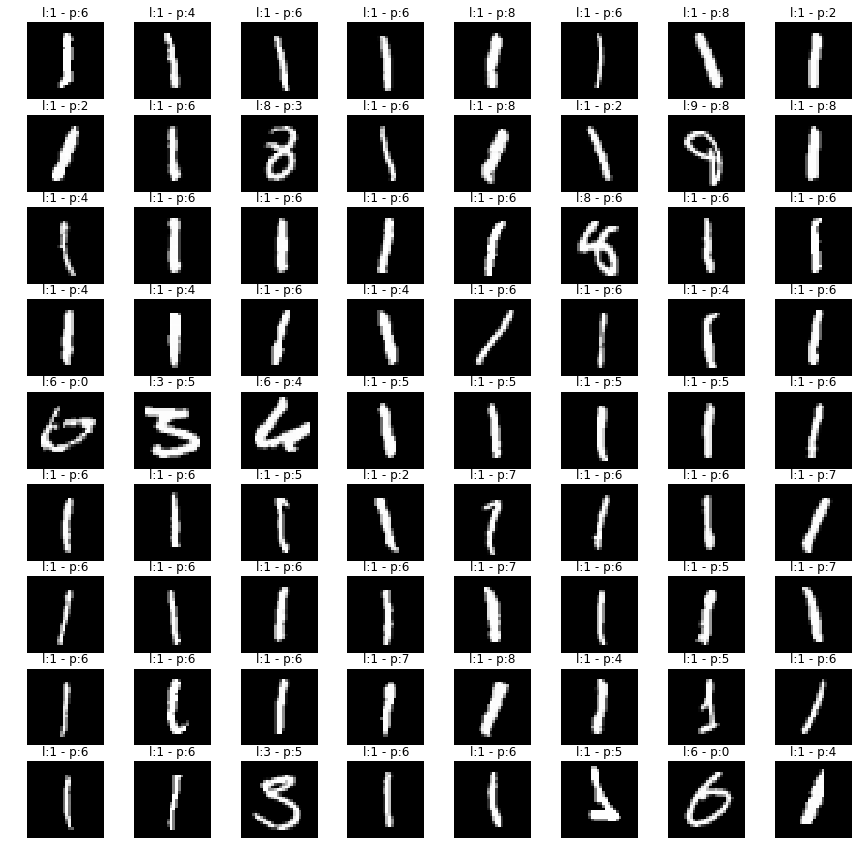

In [21]:
plt.figure(figsize=(15, 15))
step = 1
for img, label, pre in zip(error_imgs, error_labels, error_predictions):
    plt.subplot(9, 8, step)
    plt.axis('off')
    plt.imshow(img, cmap='gray')
    plt.title(f"l:{label} - p:{pre}")
    step += 1